In [163]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 3.1 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 4.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 5.3 MB/s eta 0:00:00a 0:00:01


↓	→	→	↓	→	
→	↑	→	↓	→	
↑	↑	 	↓	↓	
→	↑	 	↓	↓	
←	←	↑	→	G	
-----------------------------------------------------
↑	→	→	→	→	
↑	→	↓	→	→	
↑	↑	 	↓	↓	
↑	→	 	↓	→	
→	←	→	→	G	
-----------------------------------------------------
↑	→	→	→	→	
↑	↑	→	→	↓	
↑	↑	 	↓	↓	
↑	↑	 	↓	↓	
←	←	↓	→	G	
-----------------------------------------------------
↑	→	→	→	→	
↑	↑	→	→	→	
↑	↑	 	←	↓	
←	↑	 	↓	→	
←	←	↓	→	G	
-----------------------------------------------------
↑	→	↓	→	→	
↑	→	↓	←	↓	
↑	→	 	↓	↓	
↑	↑	 	→	←	
←	←	→	→	G	
-----------------------------------------------------
↑	→	→	→	←	
↑	→	→	→	→	
→	↑	 	↓	↓	
↑	↑	 	↓	→	
←	←	↓	→	G	
-----------------------------------------------------
↑	→	→	↓	→	
→	↑	→	↓	↓	
↑	↑	 	↓	↓	
↑	↑	 	↓	→	
←	←	↑	→	G	
-----------------------------------------------------
↓	→	→	→	→	
↑	↑	↓	→	←	
↑	↑	 	↓	→	
←	↑	 	↓	→	
↑	←	←	→	G	
-----------------------------------------------------
↑	→	↑	→	→	
→	→	→	→	↓	
↑	→	 	↓	↓	
↑	←	 	↓	→	
←	←	↑	→	G	
-----------------------------------------------------
↑	→	→	→	→	
↑	↑	→	←	

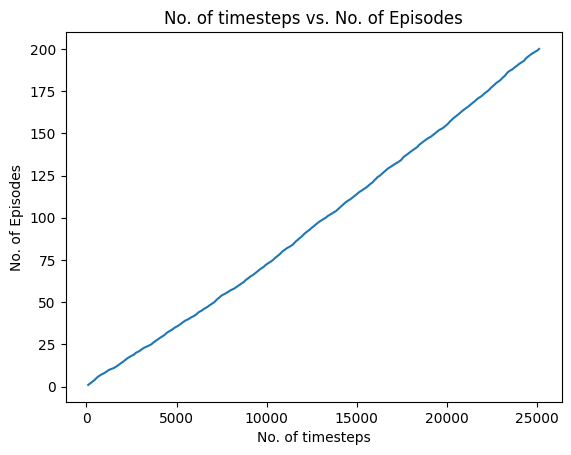

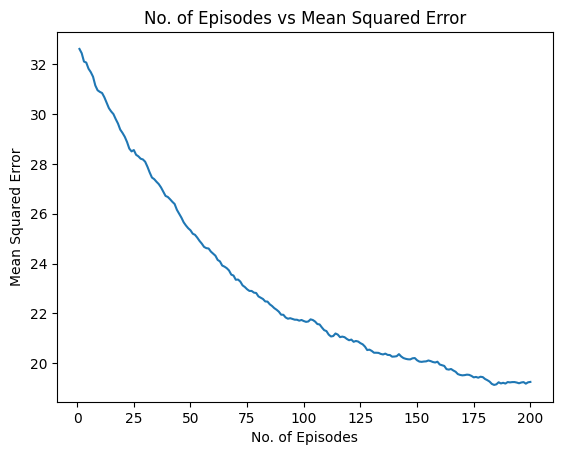

In [1]:
import random
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

states = ['s0', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 
          's18', 's19', 's20', 's21', 's22', 's23', 's24']

actions = ['a1', 'a2', 'a3', 'a4'] #up, down, right, left

transition = {
    's0': {
        'a1': {'s0': 0.95, 's1': 0.05},
        'a2': {'s5': 0.8, 's1': 0.05, 's0': 0.15},
        'a3': {'s1': 0.8, 's0': 0.15, 's5': 0.05},
        'a4': {'s0': 0.95, 's5': 0.05}
    },
    's1': {
        'a1': {'s1': 0.9, 's2': 0.05, 's0': 0.05},
        'a2': {'s6': 0.8, 's2': 0.05, 's0': 0.05, 's1': 0.1},
        'a3': {'s2': 0.8, 's1': 0.15, 's6': 0.05},
        'a4': {'s0': 0.8, 's1': 0.15, 's6': 0.05}
    },
    's2': {
        'a1': {'s2': 0.9, 's3': 0.05, 's1': 0.05},
        'a2': {'s7': 0.8, 's3': 0.05, 's1': 0.05, 's2': 0.1},
        'a3': {'s3': 0.8, 's2': 0.15, 's7': 0.05},
        'a4': {'s1': 0.8, 's2': 0.15, 's7': 0.05}
    },
    's3': {
        'a1': {'s3': 0.9, 's4': 0.05, 's2': 0.05},
        'a2': {'s8': 0.8, 's4': 0.05, 's2': 0.05, 's3': 0.1},
        'a3': {'s4': 0.8, 's3': 0.15, 's8': 0.05},
        'a4': {'s2': 0.8, 's3': 0.15, 's8': 0.05}
    },
    's4': {
        'a1': {'s4': 0.95, 's3': 0.05},
        'a2': {'s9': 0.8, 's4': 0.15, 's3': 0.05},
        'a3': {'s4': 0.95, 's9': 0.05},
        'a4': {'s3': 0.8, 's4': 0.15, 's9': 0.05}
    },
    's5': {
        'a1': {'s0': 0.8, 's6': 0.05, 's5': 0.15},
        'a2': {'s10': 0.8, 's6': 0.05, 's5': 0.15},
        'a3': {'s6': 0.8, 's0': 0.05, 's10': 0.05, 's5': 0.1},
        'a4': {'s5': 0.9, 's0': 0.05, 's10': 0.05}
    },
    's6': {
        'a1': {'s1': 0.8, 's7': 0.05, 's5': 0.05, 's6': 0.1},
        'a2': {'s11': 0.8, 's7': 0.05, 's5': 0.05, 's6': 0.1},
        'a3': {'s7': 0.8, 's1': 0.05, 's11': 0.05, 's6': 0.1},
        'a4': {'s5': 0.8, 's1': 0.05, 's11': 0.05, 's6': 0.1}
    },
    's7': {
        'a1': {'s2': 0.8, 's8': 0.05, 's6': 0.05, 's7': 0.1},
        'a2': {'s7': 0.9, 's8': 0.05, 's6': 0.05},
        'a3': {'s8': 0.8, 's2': 0.05, 's7': 0.15},
        'a4': {'s6': 0.8, 's2': 0.05, 's7': 0.15}
    },
    's8': {
        'a1': {'s3': 0.8, 's9': 0.05, 's7': 0.05, 's8': 0.1},
        'a2': {'s13': 0.8, 's9': 0.05, 's7': 0.05, 's8': 0.1},
        'a3': {'s9': 0.8, 's3': 0.05, 's13': 0.05, 's8': 0.1},
        'a4': {'s7': 0.8, 's3': 0.05, 's13': 0.05, 's8': 0.1}
    },
    's9': {
        'a1': {'s4': 0.8, 's9': 0.15, 's8': 0.05},
        'a2': {'s14': 0.8, 's9': 0.15, 's8': 0.05},
        'a3': {'s9': 0.9, 's4': 0.05, 's14': 0.05},
        'a4': {'s8': 0.8, 's4': 0.05, 's14': 0.05, 's9': 0.1}
    },
    's10': {
        'a1': {'s5': 0.8, 's11': 0.05, 's10': 0.15},
        'a2': {'s15': 0.8, 's11': 0.05, 's10': 0.15},
        'a3': {'s11': 0.8, 's5': 0.05, 's15': 0.05, 's10': 0.1},
        'a4': {'s10': 0.9, 's5': 0.05, 's15': 0.05}
    },
    's11': {
        'a1': {'s6': 0.8, 's11': 0.15, 's10': 0.05},
        'a2': {'s16': 0.8, 's11': 0.15, 's10': 0.05},
        'a3': {'s11': 0.9, 's6': 0.05, 's16': 0.05},
        'a4': {'s10': 0.8, 's6': 0.05, 's16': 0.05, 's11': 0.1}
    },
    's12': {
        'a1': {'s7': 0.8, 's13': 0.05, 's11': 0.05, 's12': 0.1},
        'a2': {'s12': 0.9, 's13': 0.05, 's11': 0.05},
        'a3': {'s13': 0.8, 's7': 0.05, 's12': 0.15},
        'a4': {'s11': 0.8, 's7': 0.05, 's12': 0.15}
    },
    's13': {
        'a1': {'s8': 0.8, 's14': 0.05, 's13': 0.15},
        'a2': {'s18': 0.8, 's14': 0.05, 's13': 0.15},
        'a3': {'s14': 0.8, 's8': 0.05, 's18': 0.05, 's13': 0.1},
        'a4': {'s13': 0.9, 's8': 0.05, 's18': 0.05}
    },
    's14': {
        'a1': {'s9': 0.8, 's14': 0.15, 's13': 0.05},
        'a2': {'s19': 0.8, 's14': 0.15, 's13': 0.05},
        'a3': {'s14': 0.9, 's9': 0.05, 's19': 0.05},
        'a4': {'s13': 0.8, 's9': 0.05, 's19': 0.05, 's14': 0.1}
    },
    's15': {
        'a1': {'s10': 0.8, 's16': 0.05, 's15': 0.15},
        'a2': {'s20': 0.8, 's16': 0.05, 's15': 0.15},
        'a3': {'s16': 0.8, 's10': 0.05, 's20': 0.05, 's15': 0.1},
        'a4': {'s15': 0.9, 's10': 0.05, 's20': 0.05}
    },
    's16': {
        'a1': {'s11': 0.8, 's16': 0.15, 's15': 0.05},
        'a2': {'s21': 0.8, 's16': 0.15, 's15': 0.05},
        'a3': {'s16': 0.9, 's11': 0.05, 's21': 0.05},
        'a4': {'s15': 0.8, 's11': 0.05, 's21': 0.05, 's16': 0.1}
    },
    's17': {
        'a1': {'s17': 0.9, 's18': 0.05, 's16': 0.05},
        'a2': {'s22': 0.8, 's18': 0.05, 's16': 0.05, 's17': 0.1},
        'a3': {'s18': 0.8, 's17': 0.15, 's22': 0.05},
        'a4': {'s16': 0.8, 's17': 0.15, 's22': 0.05}
    },
    's18': {
        'a1': {'s13': 0.8, 's19': 0.05, 's18': 0.15},
        'a2': {'s23': 0.8, 's19': 0.05, 's18': 0.15},
        'a3': {'s19': 0.8, 's13': 0.05, 's23': 0.05, 's18': 0.1},
        'a4': {'s18': 0.9, 's13': 0.05, 's23': 0.05}
    },
    's19': {
        'a1': {'s14': 0.8, 's19': 0.15, 's18': 0.05},
        'a2': {'s24': 0.8, 's14': 0.15, 's18': 0.05},
        'a3': {'s19': 0.9, 's14': 0.05, 's24': 0.05},
        'a4': {'s18': 0.8, 's14': 0.05, 's24': 0.05, 's19': 0.1}
    },
    's20': {
        'a1': {'s15': 0.8, 's21': 0.05, 's20': 0.15},
        'a2': {'s20': 0.95, 's21': 0.05},
        'a3': {'s21': 0.8, 's15': 0.05, 's20': 0.15},
        'a4': {'s20': 0.95, 's15': 0.05}
    },
    's21': {
        'a1': {'s16': 0.8, 's22': 0.05, 's20': 0.05, 's21': 0.1},
        'a2': {'s21': 0.9, 's22': 0.05, 's20': 0.05},
        'a3': {'s22': 0.8, 's16': 0.05, 's21': 0.15},
        'a4': {'s20': 0.8, 's16': 0.05, 's21': 0.15}
    },
    's22': {
        'a1': {'s22': 0.9, 's23': 0.05, 's21': 0.05},
        'a2': {'s22': 0.9, 's23': 0.05, 's21': 0.05},
        'a3': {'s23': 0.8, 's22': 0.2},
        'a4': {'s21': 0.8, 's22': 0.2}
    },
    's23': {
        'a1': {'s18': 0.8, 's24': 0.05, 's22': 0.05, 's23': 0.1},
        'a2': {'s23': 0.9, 's24': 0.05, 's22': 0.05},
        'a3': {'s24': 0.8, 's18': 0.05, 's23': 0.15},
        'a4': {'s22': 0.8, 's18': 0.05, 's23': 0.15}
    },
    's24': {
        'a1': {'s19': 0.8, 's24': 0.15, 's23': 0.05},
        'a2': {'s24': 0.95, 's23': 0.05},
        'a3': {'s24': 0.95, 's19': 0.05},
        'a4': {'s23': 0.8, 's19': 0.05, 's24': 0.15}
    }
}
reward_dict = {
    's0': {
        'a1': {'s0': 0, 's1': 0},
        'a2': {'s5': 0, 's1': 0, 's0': 0},
        'a3': {'s1': 0, 's0': 0, 's5': 0},
        'a4': {'s0': 0, 's5': 0}
    },
    's1': {
        'a1': {'s1': 0, 's2': 0, 's0': 0},
        'a2': {'s6': 0, 's2': 0, 's0': 0, 's1': 0},
        'a3': {'s2': 0, 's1': 0, 's6': 0},
        'a4': {'s0': 0, 's1': 0, 's6': 0}
    },
    's2': {
        'a1': {'s2': 0, 's3': 0, 's1': 0},
        'a2': {'s7': 0, 's3': 0, 's1': 0, 's2': 0},
        'a3': {'s3': 0, 's2': 0, 's7': 0},
        'a4': {'s1': 0, 's2': 0, 's7': 0}
    },
    's3': {
        'a1': {'s3': 0, 's4': 0, 's2': 0},
        'a2': {'s8': 0, 's4': 0, 's2': 0, 's3': 0},
        'a3': {'s4': 0, 's3': 0, 's8': 0},
        'a4': {'s2': 0, 's3': 0, 's8': 0}
    },
    's4': {
        'a1': {'s4': 0, 's3': 0},
        'a2': {'s9': 0, 's4': 0, 's3': 0},
        'a3': {'s4': 0, 's9': 0},
        'a4': {'s3': 0, 's4': 0, 's9': 0}
    },
    's5': {
        'a1': {'s0': 0, 's6': 0, 's5': 0},
        'a2': {'s10': 0, 's6': 0, 's5': 0},
        'a3': {'s6': 0, 's0': 0, 's10': 0, 's5': 0},
        'a4': {'s5': 0, 's0': 0, 's10': 0}
    },
    's6': {
        'a1': {'s1': 0, 's7': 0, 's5': 0, 's6': 0},
        'a2': {'s11': 0, 's7': 0, 's5': 0, 's6': 0},
        'a3': {'s7': 0, 's1': 0, 's11': 0, 's6': 0},
        'a4': {'s5': 0, 's1': 0, 's11': 0, 's6': 0}
    },
    's7': {
        'a1': {'s2': 0, 's8': 0, 's6': 0, 's7': 0},
        'a2': {'s7': 0, 's8': 0, 's6': 0},
        'a3': {'s8': 0, 's2': 0, 's7': 0},
        'a4': {'s6': 0, 's2': 0, 's7': 0}
    },
    's8': {
        'a1': {'s3': 0, 's9': 0, 's7': 0, 's8': 0},
        'a2': {'s13': 0, 's9': 0, 's7': 0, 's8': 0},
        'a3': {'s9': 0, 's3': 0, 's13': 0, 's8': 0},
        'a4': {'s7': 0, 's3': 0, 's13': 0, 's8': 0}
    },
    's9': {
        'a1': {'s4': 0, 's9': 0, 's8': 0},
        'a2': {'s14': 0, 's9': 0, 's8': 0},
        'a3': {'s9': 0, 's4': 0, 's14': 0},
        'a4': {'s8': 0, 's4': 0, 's14': 0, 's9': 0}
    },
    's10': {
        'a1': {'s5': 0, 's11': 0, 's10': 0},
        'a2': {'s15': 0, 's11': 0, 's10': 0},
        'a3': {'s11': 0, 's5': 0, 's15': 0, 's10': 0},
        'a4': {'s10': 0, 's5': 0, 's15': 0}
    },
    's11': {
        'a1': {'s6': 0, 's11': 0, 's10': 0},
        'a2': {'s16': 0, 's11': 0, 's10': 0},
        'a3': {'s11': 0, 's6': 0, 's16': 0},
        'a4': {'s10': 0, 's6': 0, 's16': 0, 's11': 0}
    },
    's12': {
        'a1': {'s7': 0, 's13': 0, 's11': 0, 's12': 0},
        'a2': {'s12': 0, 's13': 0, 's11': 0},
        'a3': {'s13': 0, 's7': 0, 's12': 0},
        'a4': {'s11': 0, 's7': 0, 's12': 0}
    },
    's13': {
        'a1': {'s8': 0, 's14': 0, 's13': 0},
        'a2': {'s18': 0, 's14': 0, 's13': 0},
        'a3': {'s14': 0, 's8': 0, 's18': 0, 's13': 0},
        'a4': {'s13': 0, 's8': 0, 's18': 0}
    },
    's14': {
        'a1': {'s9': 0, 's14': 0, 's13': 0},
        'a2': {'s19': 0, 's14': 0, 's13': 0},
        'a3': {'s14': 0, 's9': 0, 's19': 0},
        'a4': {'s13': 0, 's9': 0, 's19': 0, 's14': 0}
    },
    's15': {
        'a1': {'s10': 0, 's16': 0, 's15': 0},
        'a2': {'s20': 0, 's16': 0, 's15': 0},
        'a3': {'s16': 0, 's10': 0, 's20': 0, 's15': 0},
        'a4': {'s15': 0, 's10': 0, 's20': 0}
    },
    's16': {
        'a1': {'s11': 0, 's16': 0, 's15': 0},
        'a2': {'s21': 0, 's16': 0, 's15': 0},
        'a3': {'s16': 0, 's11': 0, 's21': 0},
        'a4': {'s15': 0, 's11': 0, 's21': 0, 's16': 0}
    },
    's17': {
        'a1': {'s17': 0, 's18': 0, 's16': 0},
        'a2': {'s22': -10, 's18': 0, 's16': 0, 's17': 0},
        'a3': {'s18': 0, 's17': 0, 's22': -10},
        'a4': {'s16': 0, 's17': 0, 's22': -10}
    },
    's18': {
        'a1': {'s13': 0, 's19': 0, 's18': 0},
        'a2': {'s23': 0, 's19': 0, 's18': 0},
        'a3': {'s19': 0, 's13': 0, 's23': 0, 's18': 0},
        'a4': {'s18': 0, 's13': 0, 's23': 0}
    },
    's19': {
        'a1': {'s14': 0, 's19': 0, 's18': 0},
        'a2': {'s24': 10, 's14': 0, 's18': 0},
        'a3': {'s19': 0, 's14': 0, 's24': 10},
        'a4': {'s18': 0, 's14': 0, 's24': 10, 's19': 0}
    },
    's20': {
        'a1': {'s15': 0, 's21': 0, 's20': 0},
        'a2': {'s20': 0, 's21': 0},
        'a3': {'s21': 0, 's15': 0, 's20': 0},
        'a4': {'s20': 0, 's15': 0}
    },
    's21': {
        'a1': {'s16': 0, 's22': -10, 's20': 0, 's21': 0},
        'a2': {'s21': 0, 's22': -10, 's20': 0},
        'a3': {'s22': -10, 's16': 0, 's21': 0},
        'a4': {'s20': 0, 's16': 0, 's21': 0}
    },
    's22': {
        'a1': {'s22': -10, 's23': 0, 's21': 0},
        'a2': {'s22': -10, 's23': 0, 's21': 0},
        'a3': {'s23': 0, 's22': -10},
        'a4': {'s21': 0, 's22': -10}
    },
    's23': {
        'a1': {'s18': 0, 's24': 10, 's22': -10, 's23': 0},
        'a2': {'s23': 0, 's24': 10, 's22': -10},
        'a3': {'s24': 10, 's18': 0, 's23': 0},
        'a4': {'s22': -10, 's18': 0, 's23': 0}
    },
    's24': {
        'a1': {'s19': 0, 's24': 0, 's23': 0},
        'a2': {'s24': 0, 's23': 0},
        'a3': {'s24': 0, 's19': 0},
        'a4': {'s23': 0, 's19': 0, 's24': 0}
    }
}



def policy(q_function):
    policy_formed_index = [0.0] * len(q_function)
 
    for i in range(len(q_function)):
        policy_formed_index[i] = np.argmax(q_function[i])

    up_arrow = '\u2191'
    down_arrow = '\u2193'
    right_arrow = '\u2192'
    left_arrow = '\u2190'
    
    
    # Print messages based on comparisons
    for i in range(0, len(policy_formed_index), 5):
        row = policy_formed_index[i:i+5]
        for index, element in enumerate(row):
            if index + i == 12 or index + i == 17:
                print(" ", end='\t')
            elif index + i == 24:
                print("G", end='\t')
            elif element == 0:
                print(f"{up_arrow}", end='\t')
            elif element == 1:
                print(f"{down_arrow}", end='\t')
            elif element == 2:
                print(f"{right_arrow}", end='\t')
            elif element == 3:
                print(f"{left_arrow}", end='\t')
           
        print() 
        

def calculate_mean_sq_error(v_optimal, q_function, sigma):
    
    mse_list = []
    v_approx = np.zeros_like(v_optimal)

    for state in range(len(q_function)):
        numerator_values = [math.exp(q / sigma) for q in q_function[state]]
    
         # Calculate the denominator
        denominator_values = [math.exp(q / sigma) for q in q_function[state]]
        denominator = sum(denominator_values)
    
         # Calculate action probabilities
        action_probs = [num / denominator for num in numerator_values]
         # action_probs = np.exp(q_function[state] / temperature) / np.sum(np.exp(q_function[state] / temperature))
        v_approx[state] = np.sum(action_probs * q_function[state])

    # mse = np.mean((v_approx - v_optimal) ** 2)
    mse = mean_squared_error(v_optimal, v_approx)
    mse_list.append(mse)
    mean_error = np.mean(mse_list)
    return mean_error
 
def select_action_softmax(q_function, state, sigma):
    s = int(state[1:]) #slicing to convert state into integer s23->23
    #softMax
    numerator_values = [math.exp(q / sigma) for q in q_function[s]]
    
    # Calculate the denominator
    denominator_values = [math.exp(q / sigma) for q in q_function[s]]
    denominator = sum(denominator_values)
    
    # Calculate action probabilities
    action_probabilities = [num / denominator for num in numerator_values]
    
    selected_action = random.choices([1, 2, 3, 4], action_probabilities)[0]# need to change depending on actions in environment

    selected_action = 'a' + str(selected_action)

    # selected_action_probability = action_probabilities[selected_action-1] - if used, selected_action needs to be an integer to work
    return selected_action

def runEpisode(q_function, reward_sum, sigma):
    
    state = 's0'
    action_taken = select_action_softmax(q_function, state, sigma)

    while state != 's24':
        
        transition_action_taken = transition[state][action_taken]
        selected_transition = random.choice(list(transition_action_taken.items())) #returns a tuple of (nextstate, transprobability) 
                                                                                   #for given state
        next_state = selected_transition[0] #string of 's_int'
        if next_state == 's12' or next_state == 's17':
            next_state = state
            
        reward = reward_dict[state][action_taken][next_state]
        next_action = select_action_softmax(q_function, next_state, sigma) #next_action = 'a_int'
        
        
        delta = reward + discount * q_function[int(next_state[1:])][int(next_action[1:])-1] - q_function[int(state[1:])][int(action_taken[1:])-1]
        q_function[int(state[1:])][int(action_taken[1:])-1] +=  alpha * delta

        reward_sum += 1

        state = next_state
        action_taken = next_action

    return q_function, reward_sum
            
def sarsa(sigma, num_episodes):
    v_optimal = [4.0187, 4.5548, 5.1575, 5.8336, 6.4553, 4.3716, 5.0324, 5.8013, 6.6473, 7.3907, 3.8672, 4.39, 0.0000, 7.5769, 8.4637, 3.4182, 3.8319, 0.0000, 8.5738, 9.6946, 2.9977, 2.9309, 6.0733, 9.6946, 0.0000]
    q_function = np.zeros((25, 4))
    reward_sum = 0
    error_episode = [] #mse_per_episode
    reward_list = []
    
    for i in range(num_episodes):
        
        q_function, reward_sum = runEpisode(q_function, reward_sum, sigma)
        
        mean_sq_error = calculate_mean_sq_error(v_optimal, q_function, sigma)
        error_episode.append(mean_sq_error)
        reward_list.append(reward_sum)

    return q_function, error_episode, reward_list

list_mse = []
discount = 0.9
sigma = 1
num_episodes = 200
run_algo = 20
alpha = 0.1
avg_reward = []
for i in range(run_algo):
    q_function, error_episode, reward_list = sarsa(sigma, num_episodes)
    
    list_mse.append(error_episode)

    policy(q_function)
    print('-----------------------------------------------------')
    
    avg_reward.append(reward_list)
    

nested_avg_reward = np.array(avg_reward)
nested_avg_reward = np.mean(nested_avg_reward, axis=0)
plt.plot(nested_avg_reward, range(1, num_episodes+1))
plt.title('No. of timesteps vs. No. of Episodes')
plt.xlabel('No. of timesteps')
plt.ylabel('No. of Episodes')
plt.show()

total_mse = np.mean(np.array(list_mse), axis=0)
plt.plot(range(1, num_episodes+1), total_mse)
plt.title('No. of Episodes vs Mean Squared Error')
plt.xlabel('No. of Episodes')
plt.ylabel('Mean Squared Error')
plt.show()